# Female Adolescence in *The Garden Party, and Other Stories*: Storm and Stress and the Older Man

## Meredith Phipps

16 December 2020

Introduction to Computational Literary Analysis

Department of English and Comparative Literature, Columbia University

Instructor: Jonathan Reeve

In [52]:
import nltk
import collections
from collections import Counter
import pandas as pd

import requests
response = requests.get ('https://raw.githubusercontent.com/JonathanReeve/course-computational-literary-analysis-readings/41b3b8019c4fc14f9970ff2977a1f15debf5a3b1/content/texts/garden-party.md')
gardenparty = response.text
gardenpartytokens = nltk.word_tokenize(gardenparty.lower())
gardenpartystories = gardenparty.split('\n# ')
GardenPartyStories = {"At The Bay":gardenpartystories[1] , "The Garden Party Story":gardenpartystories[2], "The Daughters of the Late Colonel":gardenpartystories[3], "Mr. and Mrs. Dove":gardenpartystories[4], "The Young Girl":gardenpartystories[5], "Life of Ma Parker":gardenpartystories[6], "Marriage A La Mode":gardenpartystories[7], "The Voyage":gardenpartystories[8], "Miss Brill":gardenpartystories[9], "Her First Ball":gardenpartystories[10], "The Singing Lesson":gardenpartystories[11], "The Stranger":gardenpartystories[12], "Bank Holiday":gardenpartystories[13], "An Ideal Family":gardenpartystories[14], "The Lady's Maid":gardenpartystories[15]}

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/meredithphipps/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

&nbsp; &nbsp; &nbsp; &nbsp; In 1904, psychologist G. Stanley Hall published his two-volume study *Adolescence*, an examination of the period between childhood and  adulthood that, up until the early 20th century, had not been viewed as a distinct period of life. With the publication of this study came great interest in the newly visible period of adolescence and its distinct characteristics. Hall’s theory of adolescence, often referred to as “storm and stress” is perhaps best known for its characterization of adolescence as “a stormy period of great agitation, when the very worst and best impulses in the human soul struggle against each other for its possession” (407). In Hall’s study, adolescence is a time when negotiation of independence, hormonal changes, and moral struggle all greatly affect the control and stability of an individual, resulting in extreme and sudden highs and lows of emotion characterized as inherent and universal. To understand this theory, one does not need to look farther than the persistent archetype of the “moody teenager” reproduced time and time again in contemporary media. One of the most prevalent questions discussed around Hall’s work (for example, in the work of anthropologist Margaret Mead) is whether or not this storm and stress is actually inherent in the adolescent phase of life, as Hall claimed, or whether there is something about a culture or society that causes such turmoil. In 1922, eighteen years after Hall’s theory of adolescence exploded onto the scene, Katherine Mansfield published her short story collection *The Garden Party, and Other Stories*, remarkable for its modernist style and its frequent focus on the lives of adolescent young women. Written decades before the emergence of Young Adult Literature, Mansfield’s collection stands out as incredibly observant and attentive to the adolescent phase.

&nbsp; &nbsp; &nbsp; &nbsp;Taking these two examinations of adolescence into account alongside each other, we naturally must ask if Mansfield’s characterization of her adolescent young women aligns with Hall’s theory of storm and stress. Utilizing computational techniques, which I discuss in detail shortly, I argue that Mansfield does, in fact, characterize adolescence as a tumultuous, emotional time for her characters. However, looking at the ways in which this storm and stress manifests within the text of the stories, I also propose that, by focusing a great deal of her fiction around young girls specifically, Mansfield adds an essential component to the examination of adolescence that Hall did not consider: the added stresses and dangers that come with being desirable to men as girls enter adolescence. I believe that this takes two forms. First, the attention of older men acts as a threatening force to the safety and comfort of the young women. Second, in a time and society in which women’s worth is defined by their desirability in the eyes of men, young women entering adolescence are unable to escape the fact that they are aging - the entrance into this new phase of life is also a marker of the beginning of the end of their perceived value. Both of these facets can be read as placing Mansfield’s adolescent young women under the male gaze, meaning that they are now being perceived and valued as sexual objects by the men in their stories. Based on the criteria of centering around adolescence, heavily featuring adolescent characters, or, in a couple cases, centering around an older woman who is confronting the reality of lost youth (and thus providing a means for examining how this collection handles the threat of aging), every story in the original collection has been included in the corpora.

&nbsp; &nbsp; &nbsp; &nbsp;The majority of this analysis utilizes Sentiment Analysis, specifically working through the Vader Lexicon built into the NLTK, which assigns a polarity value based on negative and positive associations for words or groups of words. It would be remiss not to mention that Sentiment Analysis can oftentimes be misleading due to its misunderstanding the context of a word, its inability to pick up on sarcasm, and other issues that one can imagine may arise when words are, to a degree, taken out of context and assigned a score by a computer. However, in this specific analysis, I have found the Sentiment Intensity Analyzer to be a reliable indicator of moments of storm and stress, overall accurately indicating and mapping highs and lows of mood and emotions, which I will soon demonstrate. This is, perhaps, aided by Mansfield’s matter-of-fact style and frequent use of free indirect discourse, which allows us, and the Sentiment Analysis program, to read the internal emotions and expressions of a character as well as see their actions described.

In [53]:
sentimentAnalyzer = SentimentIntensityAnalyzer() # I utilized the Sentiment Intensity Analyzer built into the NLTK because it utilizes the Vader Lexicon, as opposed to the Sentiment Analyzer which utilizes machine learning. 
def getSentiment(text): #These two functions are adapted from the work of Jonathan Reeve (see works cited).
    return sentimentAnalyzer.polarity_scores(text)['compound'] # I specified that I want the compound score so that, rather than return positive, negative, and neutral sentiment averages for a sentence, the function will return the combined average sentiment for the sentence. 
def getsentiments (story):
    storysents = nltk.sent_tokenize(story) # I sentence tokenized the story so that I could get the average sentiment for one sentence at a time. I chose to analyze on the sentence level because it allows for contextualization of individual words but also demonstrates the rapidly changing sentiment of the stories.
    storysentiments = pd.Series([getSentiment(sent) for sent in storysents]) # This line gets the sentiment for each tokenized sentence and puts the results into a pandas series so that it can be graphed.
    return storysentiments

&nbsp; &nbsp; &nbsp; &nbsp;In order to analyze incidences of storm and stress and their causes, this paper focuses on key stories from Mansfield’s collection dealing in adolescence and examines what is occurring in the stories at moments of extreme drops in sentiment. The Sentiment Analysis of the collection as a whole exhibits the extreme and sudden highs and lows suggestive of storm and stress, but zeroing in on specific incidences allows for adequate study of their causes. It is worth noting, however, that in an analysis of the collection as a whole in which incidences of the part of speech pattern “The - adjective - noun” were pulled from the text and counted, “the old woman” and “the fat man” were the two most common phrases, each occurring thirteen times. This shows how much space these figures take up within the text and suggests that they are, to a degree, dominating the collection as a whole, alluding to the way they intrude into the adolescent experience:

In [54]:
theadjectivenoun = [] # This function is adapted from the work of Jonathan Reeve (see works cited).
gardenpartytagged = nltk.pos_tag(gardenpartytokens) # I utilized the NLTK part of speech tagger in order to tag each word in the collection.
for i, wordtagpair in enumerate(gardenpartytagged): # I enumerated the tagged tokens so that I can use the "+" operation to work through the list of tagged tokens and find the chosen pattern.
    if i  == len(gardenpartytagged) - 3:
        break
    word, tag = wordtagpair # I assigned the "i+#" to the "word" and "tag" so that it will function for any variation of pattern regardless of "word" or "tag" order.
    nextword, nexttag = gardenpartytagged [i+1]
    nextnextword, nextnexttag = gardenpartytagged[i+2]
    if word == "the":
        if nexttag == "JJ":
            if nextnexttag == "NN":
                theadjectivenoun.append([word, nextword, nextnextword])
Counter([' '.join(words) for words in theadjectivenoun]).most_common(2) # I joined on the space so that I could count my word patterns as phrases, and then I utilized the Counter from collections to tally up the incidences of each phrase and directed python to print out the top two phrases fitting the pattern and the number of times they occurred (having run this function previously, I knew that there were only two phrases with 13 counts).

[('the old woman', 13), ('the fat man', 13)]

&nbsp; &nbsp; &nbsp; &nbsp;One key story in the collection dealing in adolescence is “The Young Girl,” which tells the story of an adolescent (specifically, seventeen-year-old) girl who, after being denied admission to a casino with her mother, goes to tea with her younger brother and the narrator. The Sentiment Analysis plot across the narrative time of the story exhibits the same sharp rockiness as the rest of the collection. Here, it has been adjusted for readability, showing the average sentiment of fifteen sentences at a time:

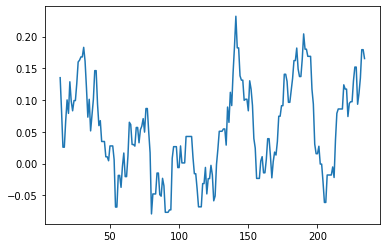

In [55]:
TheYoungGirlSentiments = getsentiments(GardenPartyStories["The Young Girl"])
TheYoungGirlSentiments.rolling(15).mean().plot() # I graphed the average sentiment of 15 sentences at a time to improve readability of the graph.

&nbsp; &nbsp; &nbsp; &nbsp;The drop in sentiment that hits its low point around sentence 80 is notable because it contains the lowest sentiment of the story and demonstrates one of the sharpest declines. This scene occurs after the young girl has just been denied entry to the casino, and she is trying to tell the narrator that she doesn’t mind not being able to enter, but she does mind being appraised by the older male bouncer. Fascinatingly, in this moment we see an exact combination of the two causes of storm and stress upon which this paper focuses - the threat of aging and the threat of male attraction, both directed and communicated through the male gaze. Take, for example, this group of sentences ending with the most negative sentiment in the story (registering at -0.7269):

In [56]:
def getsentences(story): # I wrote this small function to sentence tokenize the stories outside of the previous function so that they can be zipped with their sentiments.
    sentences = nltk.sent_tokenize(story)
    return sentences

In [58]:
TheYoungGirlSentences = getsentences(GardenPartyStories["The Young Girl"])
for sentiment, sentence in zip(TheYoungGirlSentiments[76:82], TheYoungGirlSentences[76:82]): # I zipped a range of sentences with their respective sentiments so that they can be printed out and examined alongside each other.
    print(sentiment, sentence.replace('\n', ' ')) # I removed line breaks for readability. 

0.0 "I am so awfully sorry," I murmured as the car started.
0.0 "Oh, I don't mind," said she.
-0.0572 "I don't want to look twenty-one.
0.0 Who would---if they were seventeen!
-0.7269 It's"---and she gave a faint shudder---"the stupidity I loathe, and being stared at by old fat men.
0.0 Beasts!"


&nbsp; &nbsp; &nbsp; &nbsp;Here, the story’s downward plunge in sentiment, communicated primarily though the young girl’s dialogue, is directly caused by a combination of the distress she feels at the idea of looking twenty-one at age seventeen, thus being perceived as an older age than she is by the male bouncer, and her discomfort with being under the gaze of such “old, fat men” as him at all. The young girl is physically repulsed by this gaze, as exhibited through the fact that it makes her shudder, taking root within her body. Thus, we see an incident of Hall’s idea of the sudden, intense mood swings of adolescence, but we see this mood swing occur as a direct result of the young girl’s interaction with an older man, rather than as the result of something inherent in adolescence, such as a hormonal change. Rather than being an isolated incident within the story, we see a similar moment occur at the intense downward plunge in sentiment occurring around sentence 200 when the young girl is at the tea and once again realizes that she is under the gaze of an older man:

In [59]:
for sentiment, sentence in zip(TheYoungGirlSentiments[190:200], TheYoungGirlSentences[190:200]): 
    print(sentiment, sentence.replace('\n', ' '))

0.5859 For the first time she stared about her, trying to see what there was\... She blinked; her lovely eyes wondered.
0.0 A very good-looking elderly man stared back at her through a monocle on a black ribbon.
0.0 But him she simply couldn't see.
0.0 There was a hole in the air where he was.
0.0 She looked through and through him.
0.0 Finally the little flat spoons lay still on the glass plates.
-0.1901 Hennie looked rather exhausted, but she pulled on her white gloves again.
-0.0772 She had some trouble with her diamond wrist-watch; it got in her way.
-0.5267 She tugged at it---tried to break the stupid little thing---it wouldn't break.
-0.2263 Finally, she had to drag her glove over.


&nbsp; &nbsp; &nbsp; &nbsp;In these sentences, we once again see a sharp and sudden drop in sentiment occurring around the intrusion of the male gaze. Fascinatingly, while the moment of the gaze itself is registering as neutral, the young girl’s actions immediately following the gaze are registering as markedly negative as she tries to put her gloves on over her diamond watch and gets so frustrated that she attempts to break the watch. Once again, the threat of the old man’s gaze, literally directed through a monocle, is intruding into the young girl’s body, causing her to cover up and demonstrating a direct cause for why she acts out suddenly and rashly. In this case, the sentiment analysis actually aligns perfectly with the girl’s own processing of this event, as told through a slippery combination of the third person narrator’s gaze and suggested free indirect discourse. The young girl attempts to “look through and through” the old man, not letting his gaze and presence register in her mind, as it does not register in the Sentiment Analysis, but she cannot avoid the sudden plunge as the gaze affects her despite her efforts.

&nbsp; &nbsp; &nbsp; &nbsp;Perhaps more directly summarizing this dual cause of adolescent storm and stress under the male gaze is “Her First Ball,” a story in which an adolescent girl attends her first dance and the event is overshadowed by her interactions with an old bachelor in attendance. Once again, we see a Sentiment Analysis plot full of steep and dramatic dynamics adjusted for readability by demonstrating averages across fifteen sentences at a time:

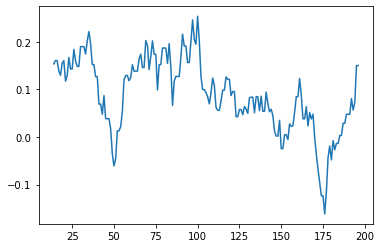

In [60]:
HerFirstBallSentiments = getsentiments(GardenPartyStories["Her First Ball"])
HerFirstBallSentiments.rolling(15).mean().plot()

&nbsp; &nbsp; &nbsp; &nbsp;Here, in a mostly positive story with many high peaks, there are two notable plunges. The first, before the girl meets the older man, occurs alongside her nerves surrounding the ball. The second (occurring around sentence 175), however, which plunges much faster and far lower, occurs, once again, alongside the intrusion of an older man, in this case a more physical intrusion than that experienced by the adolescent girl in “The Young Girl.” This section also, notably, includes an awareness and fear of aging in the context of the male gaze:

In [61]:
HerFirstBallSentences = getsentences(GardenPartyStories["Her First Ball"])
for sentiment, sentence in zip(HerFirstBallSentiments[157:174], HerFirstBallSentences[157:174]): 
    print(sentiment, sentence.replace('\n', ' '))

0.0243 "Of course," he said, "you can't hope to last anything like as long as that.
0.4215 No-o," said the fat man, "long before that you'll be sitting up there on the stage, looking on, in your nice black velvet.
0.4939 And these pretty arms will have turned into little short fat ones, and you'll beat time with such a different kind of fan---a black bony one."
0.0 The fat man seemed to shudder.
0.5719 "And you'll smile away like the poor old dears up there, and point to your daughter, and tell the elderly lady next to you how some dreadful man tried to kiss her at the club ball.
-0.6887 And your heart will ache, ache"---the fat man squeezed her closer still, as if he really was sorry for that poor heart---"because no one wants to kiss you now.
-0.7351 And you'll say how unpleasant these polished floors are to walk on, how dangerous they are.
0.0 Eh, Mademoiselle Twinkletoes?"
0.0 said the fat man softly.
-0.6064 Leila gave a light little laugh, but she did not feel like laughing.
0.42

&nbsp; &nbsp; &nbsp; &nbsp;Looking at these sentiments and their corresponding sentences, we can certainly see moments where sarcasm is not registered (“Eh, Mademoiselle Twinkletoes?”) or where the casually threatening tone of the man is not counted as negative, but overall the sentiment plot of the story picks up on the fact that this section is markedly negative, and that much of that negativity is located in the old man’s dialogue as he makes the young girl aware that soon, she will age and be one of the undesirable, fragile old women watching the ball from a distance. This gives us insight into what is so threatening about aging even as the young girl faces the literal physical threat of the old man’s presence. The sentence “‘and your heart will ache, ache’ - the fat man squeezed her closer still, as if he really was sorry for that poor heart - ‘because no one wants to kiss you now,’” registering with a strong negative sentiment of -0.6887, perhaps summarizes the cause of storm and stress in this moment. The young girl’s space is being physically invaded as the old man pulls her closer, and her youthful joy itself is being shattered by the realization that soon, she will age and be undesirable - nobody will want to kiss her anymore. This section as a whole also, perhaps, demonstrates the double-bind Mansfield’s adolescent young women are in: they are uncomfortable with, and physically invaded by, the attention they receive from old men as a result of their adolescence, but they are also fearful of the time when they will age out of adolescence and no longer be valued at all. If they hope to have a husband, a marker of success and one of the only options available to women at this time, they are at the beginning of the end of their chance at courtship. In other words, as the girl herself asks “was this first ball only the beginning of her last ball, after all?”. This question becomes infinitely more troubling when we consider that the girl’s experience with this first ball itself is now climaxing in this steep, negative plunge. The only options given to her in this moment are this ball, marked by the downward turn, and the future balls she is imagining where she will be up on the stage watching her daughters experience the same stress she is currently undergoing. Thus, this combination of the threatening, invasive presence of an older man and the fear of aging are once again the cause of the adolescent’s steep downward mood swing, and this time the effect of the male gaze is even stronger, extending through time and marking the current moment of the ball and all future balls. These trends are not isolated - we can point, for example, to the moment in the story “Bank Holiday” where a soldier likes to watch a young girl’s “little frightened face,” or, even on a platonic level, to the sisters in “The Daughters of the Late Colonel” who cannot escape the fear of their father’s gaze even after his death.

&nbsp; &nbsp; &nbsp; &nbsp;Does this collection, then, suggest that relationships between men and women will always occur within the unhealthy dynamics this essay has explored thus far? By examining, once again, the Sentiment Analysis of another key story centering on adolescence, “The Garden Party,” we can see that this is not the case. Again, this Sentiment Analysis plot is adjusted to show the average sentiment of fifteen sentences at a time:

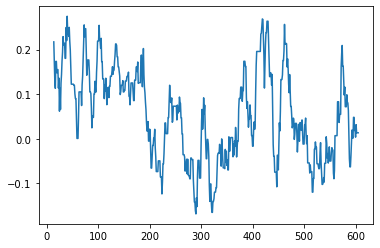

In [62]:
TheGardenPartySentiments = getsentiments(GardenPartyStories["The Garden Party Story"])
TheGardenPartySentiments.rolling(15).mean().plot()

&nbsp; &nbsp; &nbsp; &nbsp;Examining the first highest peak, near sentences 20 - 40, we again see an adolescent girl, Laura, encounter older men, but this time the interaction is reading as overall positive. What, then, makes this interaction different? For one, in this case the men are not marked by their age in the narrative like the other men we have encountered - rather than being “old men,” they are “workmen.” Laura is in charge of directing these workmen, which inverts the typical power imbalance we see between older men and adolescent young women. However, the text is more nuanced than simply suggesting that Laura having power due to her class is the positive solution to the gendered power imbalance. For example, the scores for each sentence in this section are as follows:

In [63]:
TheGardenPartySentences = getsentences(GardenPartyStories["The Garden Party Story"])
for sentiment, sentence in zip(TheGardenPartySentiments[20:40], TheGardenPartySentences[20:40]): 
    print(sentiment, sentence.replace('\n', ' '))

-0.0516 They carried staves covered with rolls of canvas, and they had big tool-bags slung on their backs.
0.5106 They looked impressive.
0.0 Laura wished now that she had not got the bread-and-butter, but there was nowhere to put it, and she couldn't possibly throw it away.
-0.5456 She blushed and tried to look severe and even a little bit short-sighted as she came up to them.
0.4404 "Good morning," she said, copying her mother's voice.
-0.8174 But that sounded so fearfully affected that she was ashamed, and stammered like a little girl, "Oh---er---have you come---is it about the marquee?"
0.5423 "That's right, miss," said the tallest of the men, a lanky, freckled fellow, and he shifted his tool-bag, knocked back his straw hat and smiled down at her.
0.0 "That's about it."
0.879 His smile was so easy, so friendly that Laura recovered.
0.2942 What nice eyes he had, small, but such a dark blue!
0.4588 And now she looked at the others, they were smiling too.
0.2937 "Cheer up, we won't bi

&nbsp; &nbsp; &nbsp; &nbsp;As we can see, the sentences that stand out as negative within this section are the moments where Laura is attempting to order the men around- she is uncomfortable trying to claim authority in this moment and embarrassed by her attempts to play the adult. She does not succeed in claiming all of the power given to her in this position. Instead, the moment is saved by one of the men and his easy, friendly smile. Interestingly, Laura comments on his eyes as one of the factors that puts her at ease, acting in direct contrast to the way the male gaze has operated thus far in the collection. Taking into account the fairly complicated mesh of gender dynamics and class dynamics in this moment, what we ultimately arrive at is, perhaps, a more neutral power balance than we have seen thus far in the text. Rather than have a young girl interacting with a presumably wealthy and powerful older man, we have a young girl interacting with older men who are, at that moment, working for her family and supposedly being directed by her, even as they actually do most of the directing, further neutralizing the power imbalance. While Mansfield certainly is not arguing that class inequality is a positive thing in this story (in fact, she’s arguing quite the opposite), the way this moment stands out as markedly high in sentiment compared to the others like it in the collection does suggest that what makes the other encounters so intensely negative is the lack of power the adolescent girls have relative to the older men and their invasive gazes. It is no wonder that this threatening powerlessness would be a major frustration for adolescent young women and cause outbursts, both emotional and physical.

&nbsp; &nbsp; &nbsp; &nbsp;Thus, taking all of this into account, we can see that Mansfield’s portrayal of adolescence is, indeed, one of storm and stress in which her female adolescent characters are experiencing extreme highs and lows of emotion in rapid succession. We can also see that Mansfield presents causes for these dynamic moments in her stories, and that a trend of these causes is the invasive presence or gaze of an older man which threatens safety and makes one aware of the impending end of her youth. Furthermore, we see that Mansfield adds nuance to this idea through the way that these interactions take place within an extreme power imbalance - young girls are forced to interact with older men in the adult world, but they are not yet able to claim the power of an adult, and they are certainly not able to claim the power of a man. In this way, Mansfield’s focus on and characterization of female adolescence adds, within a feminist tradition, nuance to Hall’s view of storm and stress and demonstrates that there are unique causes for young women that go beyond hormonal shifts or negotiations of identity. Rather, the causes of storm and stress for Mansfield’s characters are woven into the very way their societies are organized and where that organization places them within its power hierarchy <sup>1</sup>.

## Notes
1. Though beyond the scope of this paper, it should be noted that this portrayal of society's role in storm and stress could be put into coversation with Anthropologist Margaret Meade's 1928 ethnography *Coming of Age in Samoa*  

## Works Cited

Hall, G. Stanley. Adolescence: Its psychology and its relations to physiology, anthropology, 
sociology, sex, crime, religion, and education, Vol. 1., 1904. *APA PsychNet*, https://doi-org.ezproxy.cul.columbia.edu/10.1037/14684-000

Mansfield, Katherine. The Garden Party, and Other Stories. 1922. *Project Gutenberg*, 1998.
http://www.gutenberg.org/ebooks/1429

Reeve, Jonathan. “Lecture 12: POS and Corpora.” Introduction to Computational Literary
Analysis, Columbia University, 21 October 2020, Course Lecture.

Reeve, Jonathan. “Lecture 18: Sentiment Analysis and Macro-Etymological Analysis.” Introduction to Computational Literary Analysis, Columbia University, 11&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp; November 2020, Course Lecture.